     Title     Type     Genre  Release Year Rating   Duration        Country
0  Title 1  TV Show    Comedy          1955     PG  3 Seasons          Japan
1  Title 2  TV Show    Horror          2020      G  3 Seasons          India
2  Title 3  TV Show    Action          1966  TV-PG    140 min  United States
3  Title 4    Movie  Thriller          2011  PG-13  3 Seasons         Canada
4  Title 5  TV Show   Romance          1959  TV-14    172 min          India


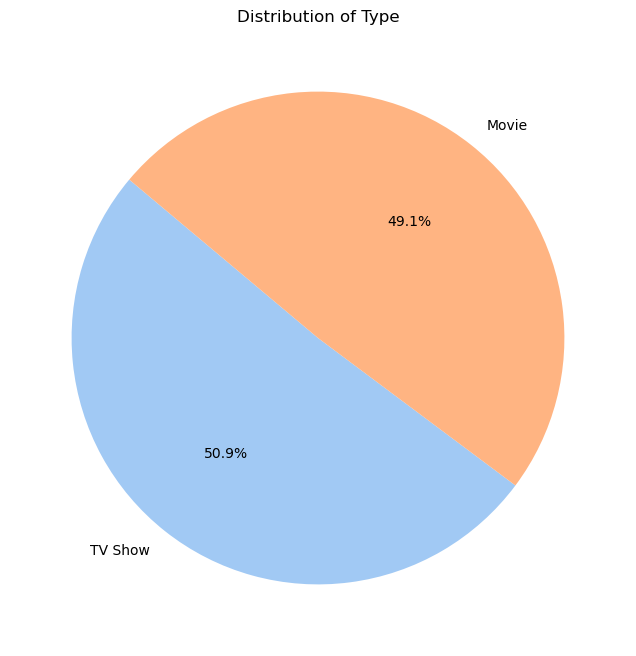

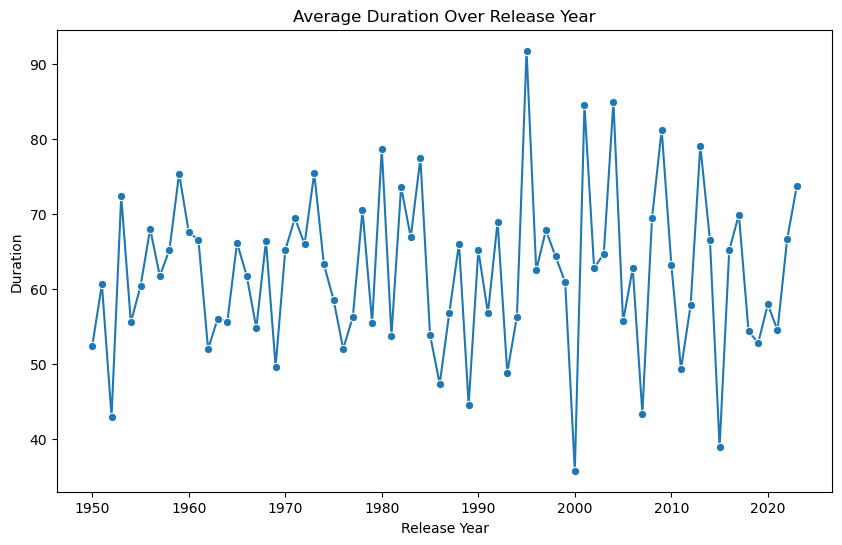

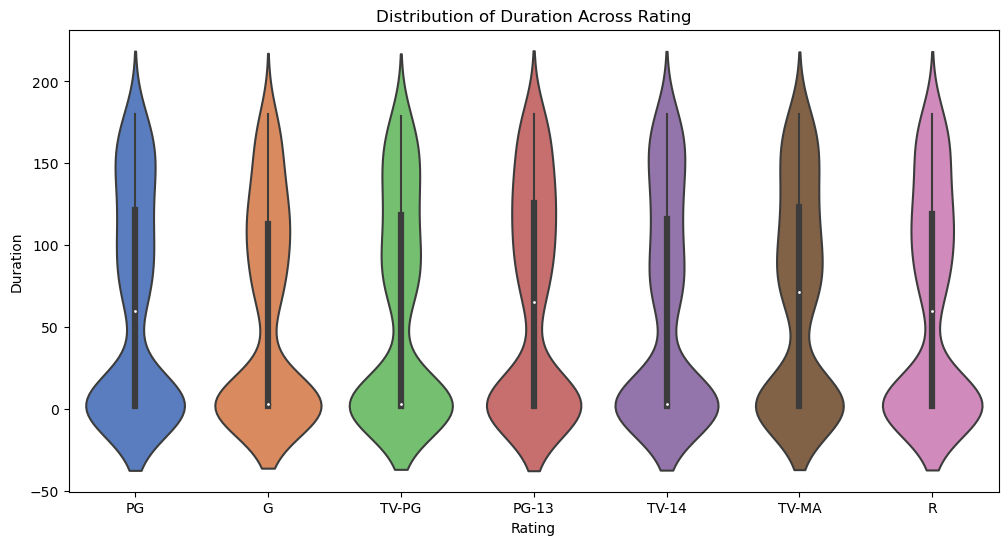

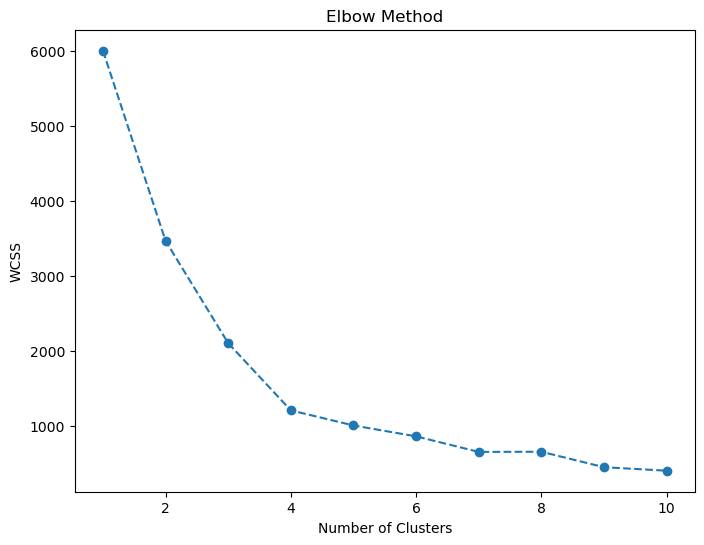

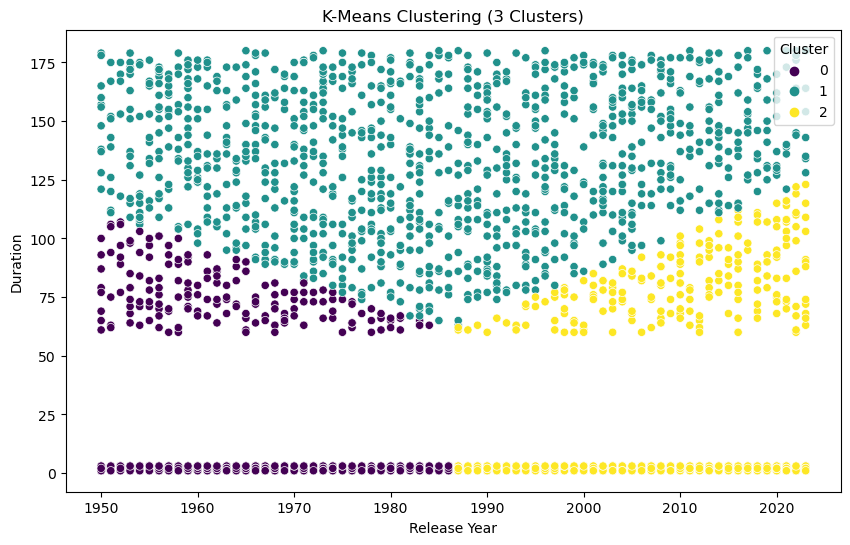

Mean Squared Error: 4121.827560163853
R^2 Score: 2.0339556705550876e-08


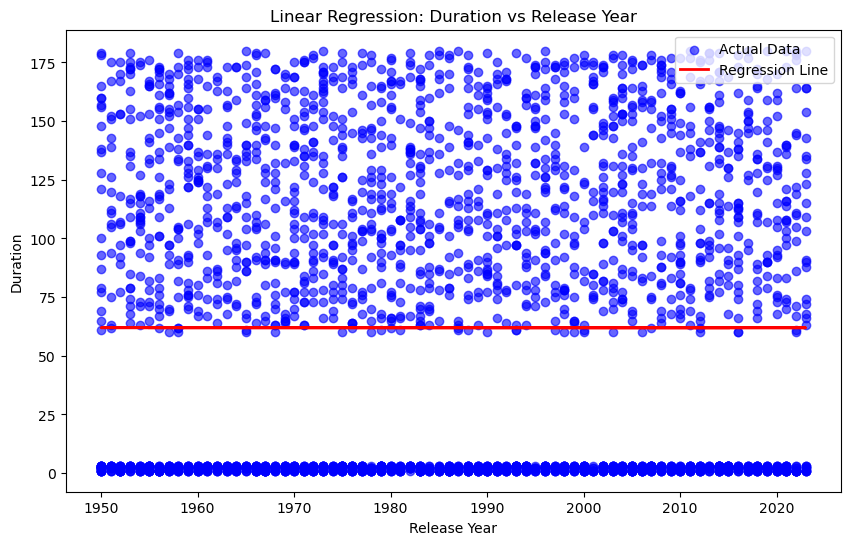

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv("Netflix_Movies_and_TV_Shows.csv")
# Display the first few rows of the dataset
print(df.head())

# Data Cleaning
df['Duration'] = df['Duration'].str.replace(' min', '').str.replace(' Seasons', '').str.replace(' Season', '').astype(float)
df.dropna(inplace=True)  # Drop rows with missing or invalid data

# 1. Pie Chart
def create_pie_chart(data, column_name):
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f"Distribution of {column_name}")
    plt.show()

create_pie_chart(df, 'Type')

# 2. Line Plot
def create_line_plot(data, x_column, y_column):
    data_grouped = data.groupby(x_column)[y_column].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data_grouped, x=x_column, y=y_column, marker='o')
    plt.title(f"Average {y_column} Over {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

create_line_plot(df, 'Release Year', 'Duration')

# 3. Violin Plot
def create_violin_plot(data, x_column, y_column):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=data, x=x_column, y=y_column, palette="muted")
    plt.title(f"Distribution of {y_column} Across {x_column}")
    plt.show()

create_violin_plot(df, 'Rating', 'Duration')

# 4. Elbow Plot for K-Means Clustering
def create_elbow_plot(data, features):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

create_elbow_plot(df, ['Release Year', 'Duration'])

# K-Means Clustering and Scatter Plot
def perform_kmeans_and_plot(data, features, n_clusters):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=features[0], y=features[1], hue='Cluster', palette='viridis')
    plt.title(f"K-Means Clustering ({n_clusters} Clusters)")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

perform_kmeans_and_plot(df, ['Release Year', 'Duration'], 3)

# 5. Linear Regression
def perform_linear_regression(data, x_column, y_column):
    # Filter data to remove outliers or invalid values
    data = data.dropna(subset=[x_column, y_column])
    X = data[[x_column]].values
    y = data[y_column].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {model.score(X, y)}")

    # Plot regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], y, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(data[x_column], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f"Linear Regression: {y_column} vs {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

perform_linear_regression(df, 'Release Year', 'Duration')


In [2]:
#Descriptive Statistics
df.describe()

,Release Year,Duration,Cluster
count,3000.000000,3000.000000,3000.000000
mean,1985.935333,61.934000,1.004667
std,21.220617,64.212164,0.788787
min,1950.000000,1.000000,0.000000
25%,1968.000000,2.000000,0.000000
50%,1986.000000,61.000000,1.000000
75%,2004.000000,120.000000,2.000000
max,2023.000000,180.000000,2.000000


In [3]:
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Release Year  Duration   Cluster
Release Year      1.000000 -0.000143  0.729775
Duration         -0.000143  1.000000  0.020533
Cluster           0.729775  0.020533  1.000000
